In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data from car price CSV

df = pd.read_csv('CarPrice_Assignment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
# Droppig Unused column
df = df.drop('car_ID', axis=1)

In [5]:
#  Derived column Car Company

df['CarCompany'] = df['CarName'].apply(lambda x: str(x).split(" ")[0])

<Figure size 2880x3240 with 0 Axes>

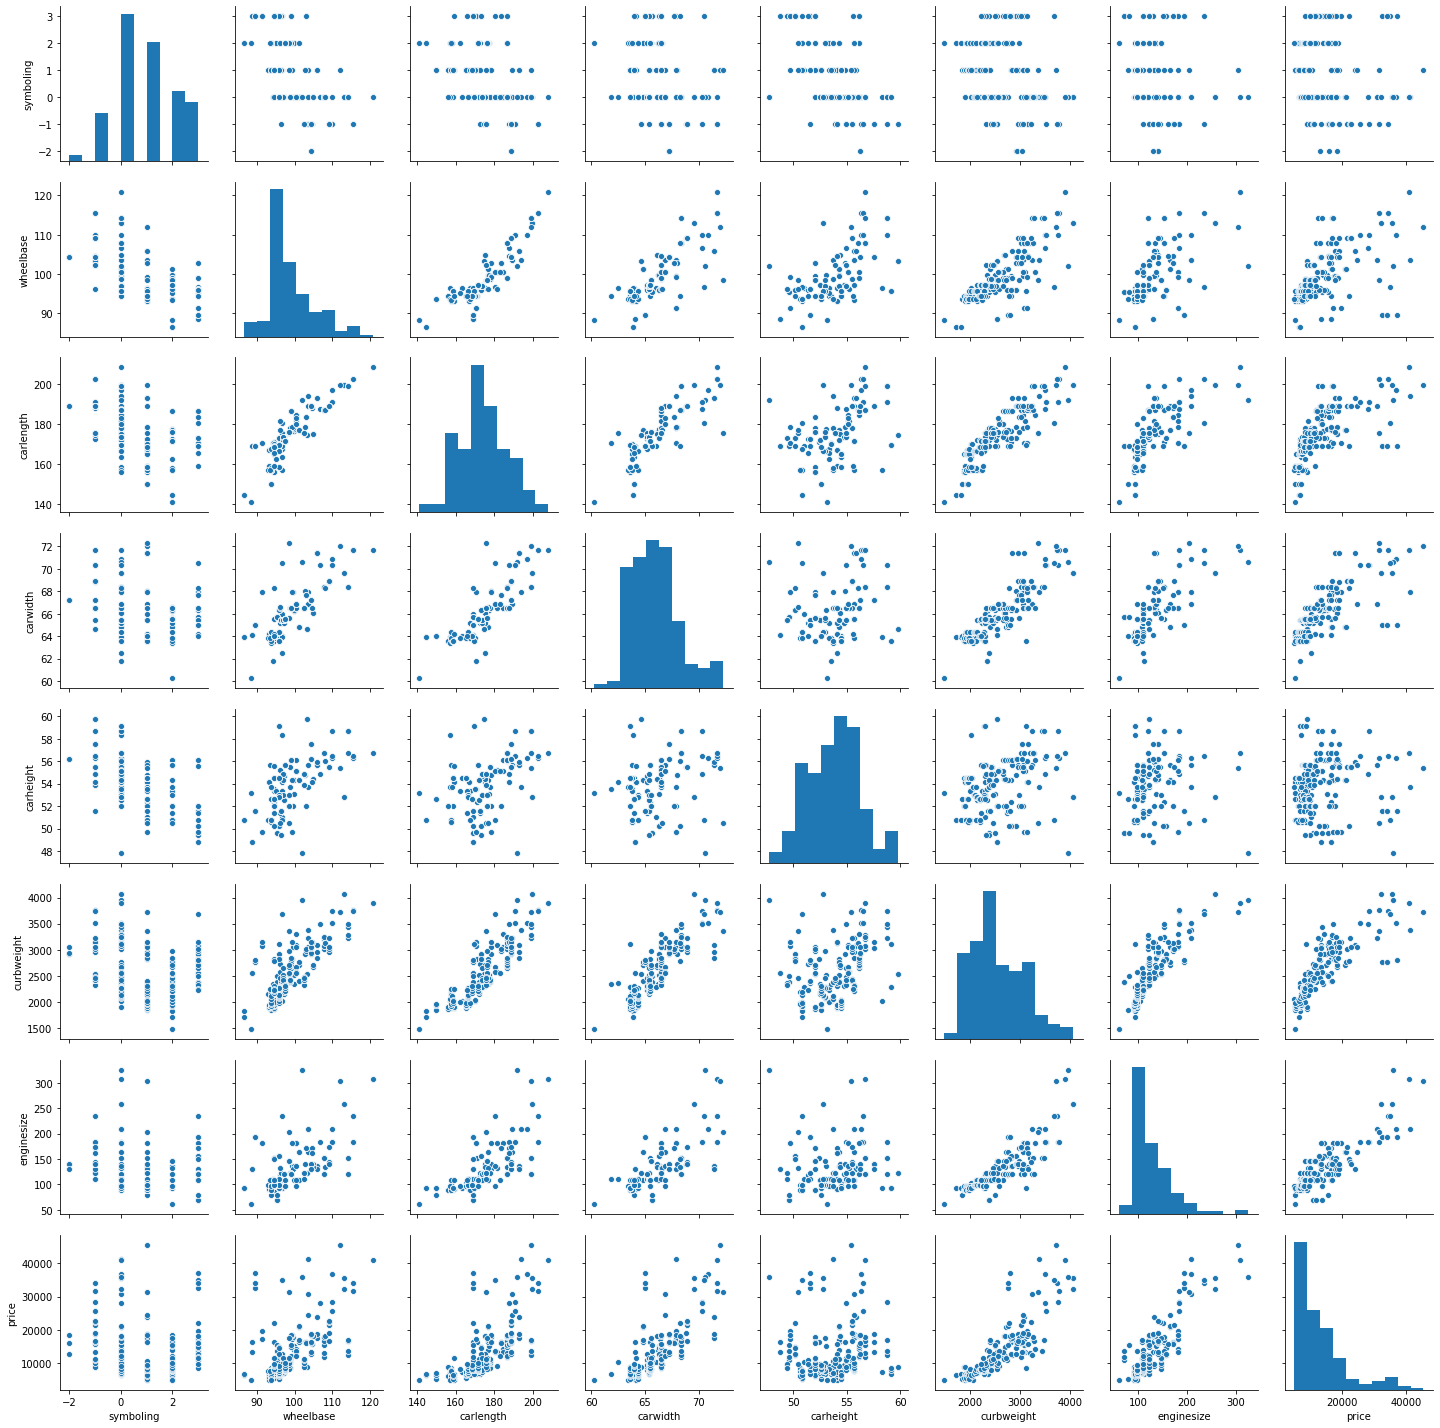

In [6]:
fig_size = plt.figure(figsize=(40,45))
columns = ['symboling','wheelbase','carlength','carwidth',
                                'carheight','curbweight','enginesize','price']
sns.pairplot(data = df, y_vars=columns, x_vars=columns)

<Figure size 2880x3240 with 0 Axes>

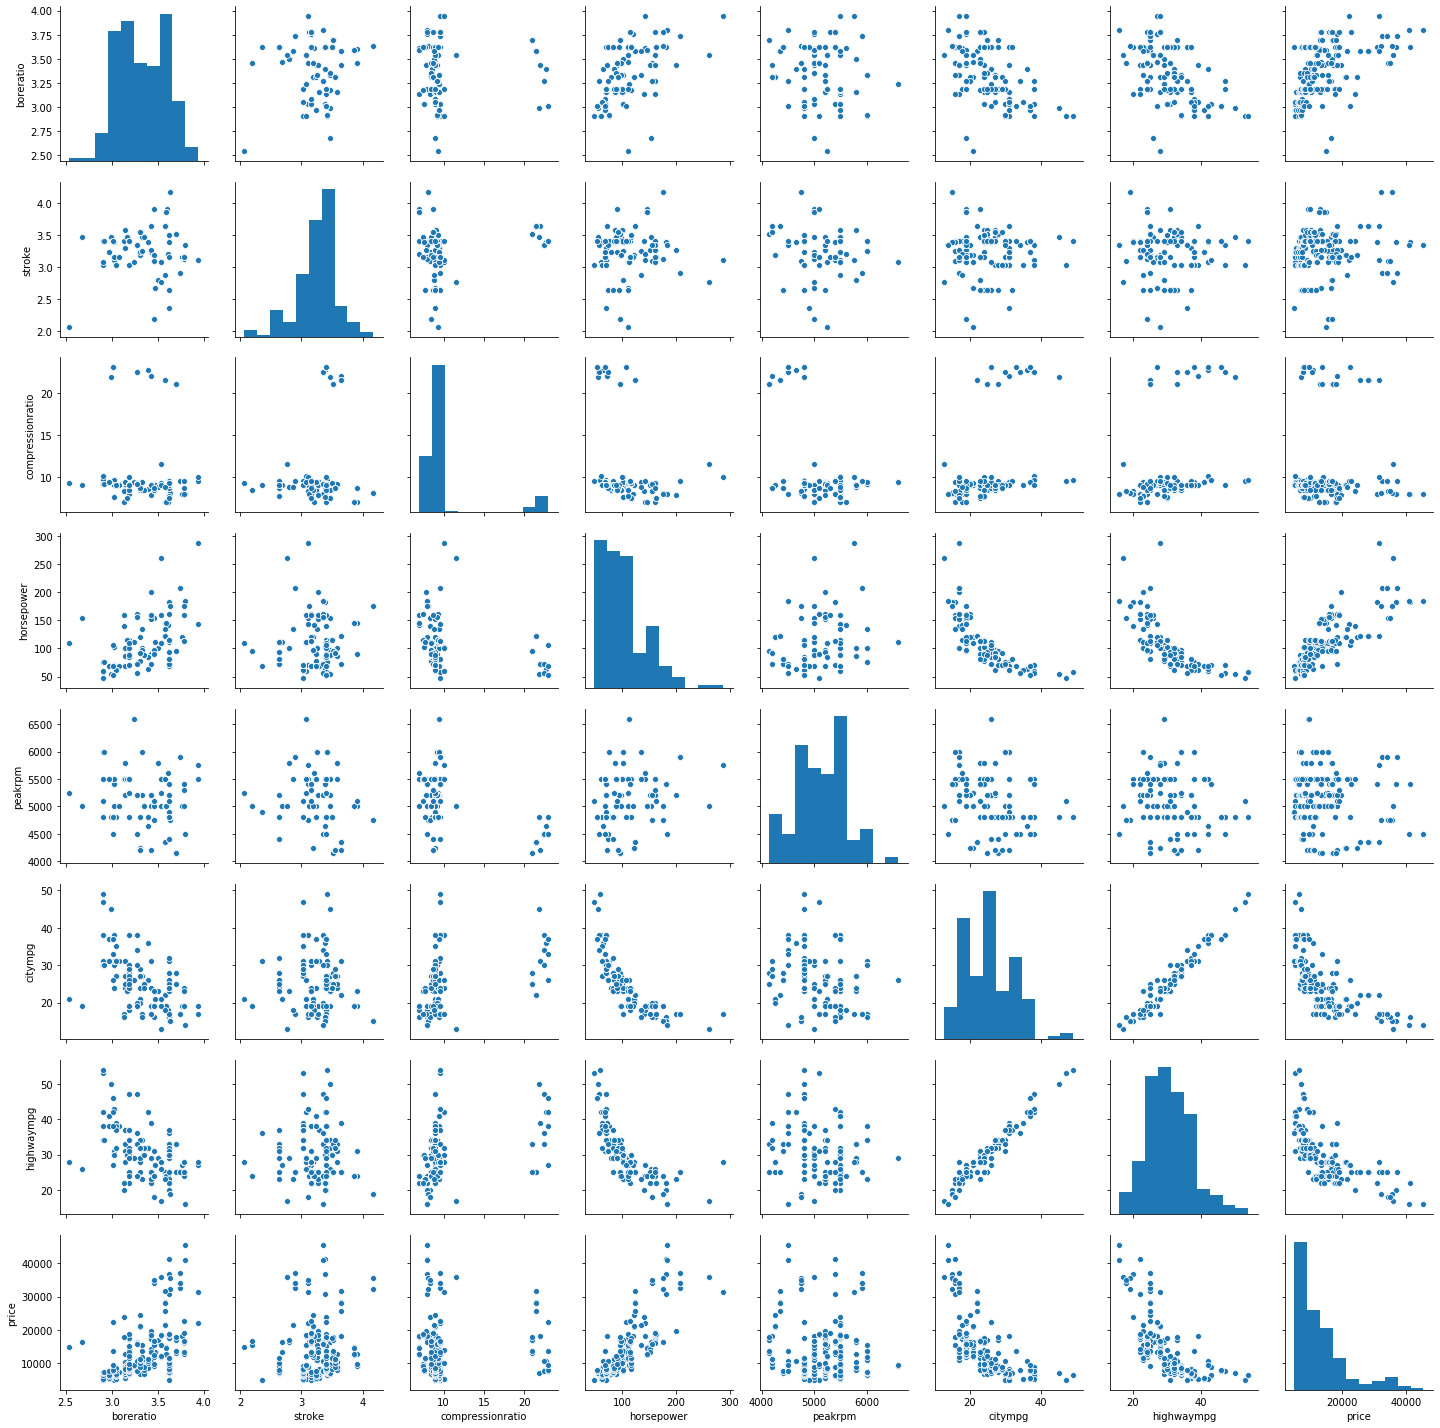

In [7]:
fig_size = plt.figure(figsize=(40,45))
columns = ['boreratio', 'stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg','price']
sns.pairplot(data = df, y_vars=columns, x_vars=columns)

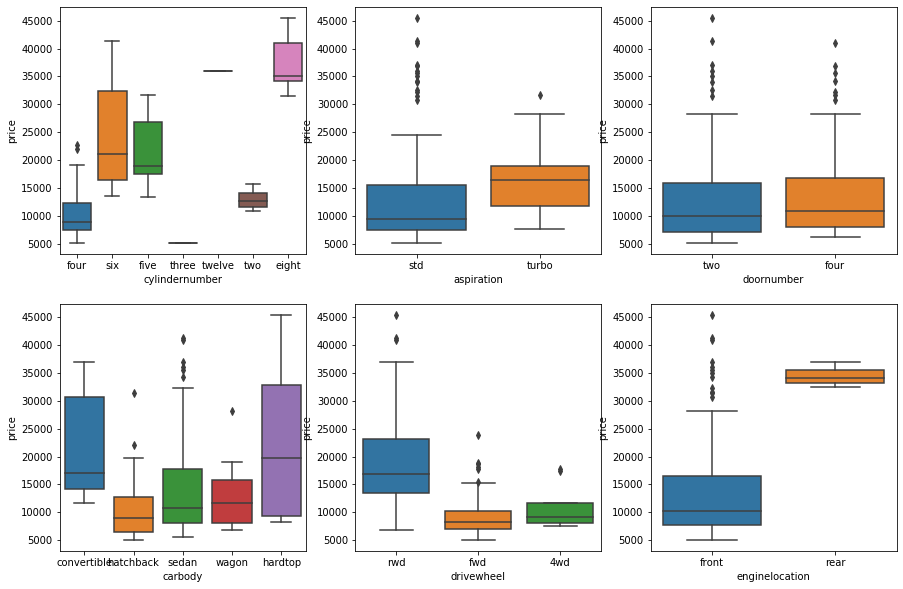

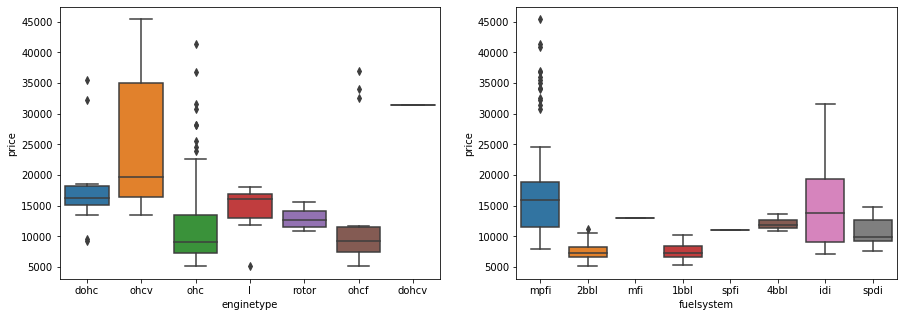

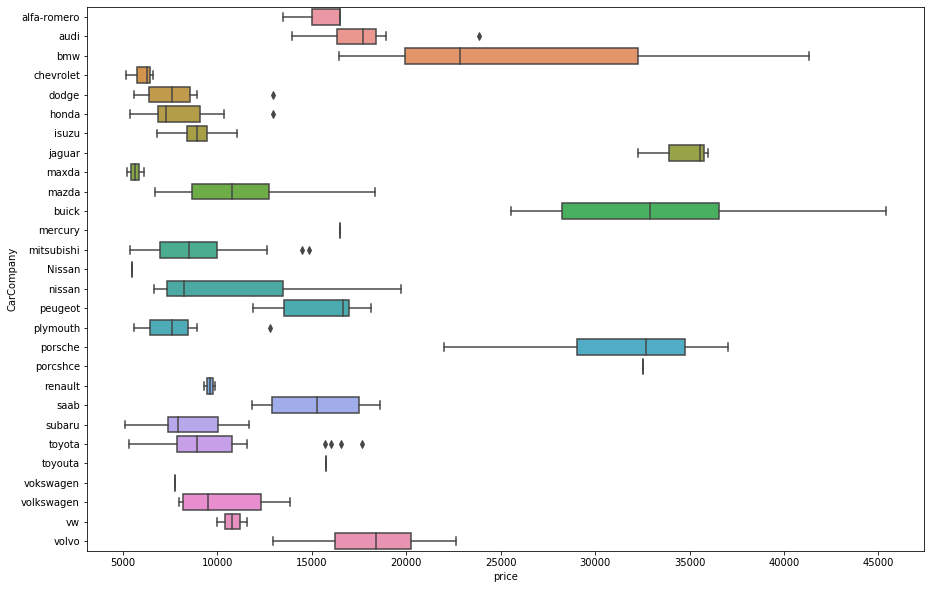

In [8]:
# Visualizing the categorical variable
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.boxplot(x='cylindernumber', y='price', data=df)
plt.subplot(232)
sns.boxplot(x='aspiration', y='price', data=df)
plt.subplot(233)
sns.boxplot(x='doornumber', y='price', data=df)
plt.subplot(234)
sns.boxplot(x='carbody', y='price', data=df)
plt.subplot(235)
sns.boxplot(x='drivewheel', y='price', data=df)
plt.subplot(236)
sns.boxplot(x='enginelocation', y='price', data=df)

plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x='enginetype', y='price', data=df)
plt.subplot(122)
sns.boxplot(x='fuelsystem', y='price', data=df)
plt.figure(figsize=(15,10))

sns.boxplot(x='price', y='CarCompany', data=df)

# Preparing the data for the modeling
   - Encoding 

    - convert categorical var to dummy one.

In [9]:
# Dropping redundent dummy variables 
df = df.drop('CarName', axis=1)
X_cat = df.select_dtypes(include=['object'])
X_enc = X_cat.copy()
X_enc = pd.get_dummies(X_enc, drop_first=True)
df = df.drop(X_cat.columns, axis=1)

In [10]:

final_car_df = pd.concat([df,X_enc], axis=1)
final_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
symboling                 205 non-null int64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
fueltype_gas              205 non-null uint8
aspiration_turbo          205 non-null uint8
doornumber_two            205 non-null uint8
carbody_hardtop           205 non-null uint8
carbody_hatchback       

# Split into test and train data

In [11]:
df_train, df_test = train_test_split(final_car_df, train_size=0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(143, 71)
(62, 71)


In [12]:
#initializing min max scaler 
scaler = MinMaxScaler()
# create list of numeric vars
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight',
            'enginesize','boreratio','stroke','compressionratio','horsepower', 
            'peakrpm','citympg','highwaympg','price'] 

# fit the dataset

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_toyouta,CarCompany_vokswagen,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
122,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,0,0,0,0,0,0,0
125,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,1,0,0,0,0,0,0,0,0,0
166,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,1,0,0,0,0,0
1,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,1,0


In [13]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_toyouta,CarCompany_vokswagen,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,0.797203,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.020979,0.013986,0.020979,0.076923,0.132867,0.006993,0.0,0.034965,0.041958,0.013986
std,1.195999,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.143818,0.117845,0.143818,0.267406,0.340624,0.083624,0.0,0.184337,0.201198,0.117845
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


# Step 3 Traning the Model

In [14]:
y_train = df_train.pop('price')
X_train = df_train

In [15]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
23,enginelocation_rear,inf
57,CarCompany_peugeot,inf
63,CarCompany_subaru,inf
27,enginetype_ohcf,inf
29,enginetype_rotor,inf
33,cylindernumber_three,inf
35,cylindernumber_two,inf
25,enginetype_l,inf
14,fueltype_gas,2141.16
38,fuelsystem_idi,642.70


In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [17]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 56),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 35),
 ('highwaympg', False, 26),
 ('fueltype_gas', False, 29),
 ('aspiration_turbo', False, 14),
 ('doornumber_two', False, 45),
 ('carbody_hardtop', False, 31),
 ('carbody_hatchback', False, 30),
 ('carbody_sedan', False, 32),
 ('carbody_wagon', False, 33),
 ('drivewheel_fwd', False, 54),
 ('drivewheel_rwd', False, 39),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 12),
 ('enginetype_l', False, 7),
 ('enginetype_ohc', False, 59),
 ('enginetype_ohcf', False, 10),
 ('enginetype_ohcv', False, 40),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 28),
 (

In [18]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'CarCompany_bmw', 'CarCompany_porsche'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [19]:
# Creating X_test dataframe with RFE selected variables
col = ['carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginelocation_rear', 'enginetype_rotor',
       'CarCompany_bmw', 'CarCompany_porsche']
X_train_rfe = X_train[col]

In [20]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [21]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [22]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           2.55e-65
Time:                        20:48:50   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1478    

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [23]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

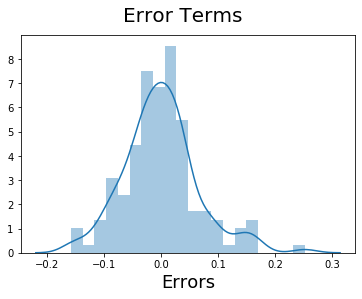

In [24]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions

In [25]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_toyouta,CarCompany_vokswagen,CarCompany_volkswagen,CarCompany_volvo,CarCompany_vw
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0
mean,0.919355,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,...,0.016129,0.0,0.048387,0.016129,0.193548,0.0,0.016129,0.064516,0.080645,0.0
std,1.358620,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,...,0.127000,0.0,0.216335,0.127000,0.398304,0.0,0.127000,0.247676,0.274512,0.0
min,-2.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,2.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,3.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [26]:
y_test = df_test.pop('price')
X_test = df_test

In [27]:
X_test_new = X_test[X_train[col].columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [28]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

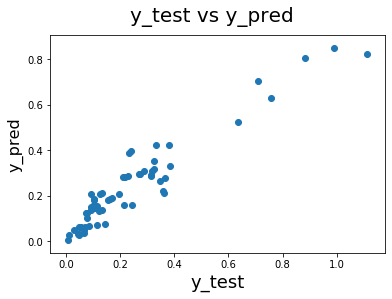

In [29]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [30]:
# calculating R2 score
from sklearn.metrics import r2_score
print(round(r2_score(y_test,y_pred),2))

0.89
